#Extracción de los datos

In [46]:
import pandas as pd

#Carga de los datos desde una API
url="https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

#### Creación de un dataframe para la visualización de los datos.

In [47]:
try:
    df = pd.read_json(url)
    print(f"DataFrame cargado exitosamente. Filas: {len(df)}, Columnas: {len(df.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")

df.head()

DataFrame cargado exitosamente. Filas: 7267, Columnas: 6


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#Transformación

#### Explorar las columnas del dataset y verificar sus tipos de datos.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB




Diccionario de datos

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

Columnas más relevantes para el análisis:

* customerID: Esta columna es para identificar al cliente de forma unica
* Churn: Es la que nos indica si el cliente abandono o no
* ternure: Nos dice por cuanto tiempo el cliente estuvo en la empresa
* InternetService: Columna para conocer las preferencias del cliente
* Contract: El tipo de contrato que tiene el cliente
* Charges.Monthly: Total de los servicios del cliente, para conocer su facturación
* Charges.Total: Todo lo que gastó el cliente en los servicios




#### Comprobación de incoherencias en los datos

In [49]:
# Verificación de datos nulos
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [50]:
#Verificación de datos duplicados
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [51]:
#Busando Strings vacios.
(df == '').sum()

,0
customerID,0
Churn,224
customer,0
phone,0
internet,0
account,0


In [52]:
#Buscando errores de formato
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


#### Manejo de inconsistencias

In [53]:
#Crearemos un nuevo DataFrame en el cual se eliminen los Strings vacíos de la columna "Churn"

dfLimpio = df[df['Churn'] != ''].copy()

In [54]:
#Verificamos que se hayan eliminado los strings vacios
(dfLimpio == '').sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [55]:
# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
dfLimpio['Churn'] = dfLimpio['Churn'].map({'Yes': 1, 'No': 0})

#Carga y análisis

####Análisis descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [56]:
dfLimpio.describe()

,Churn
count,7043.000000
mean,0.265370
std,0.441561
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


#### Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

Análisis de la Distribución de Evasión:
Churn
0    5174
1    1869
Name: count, dtype: int64


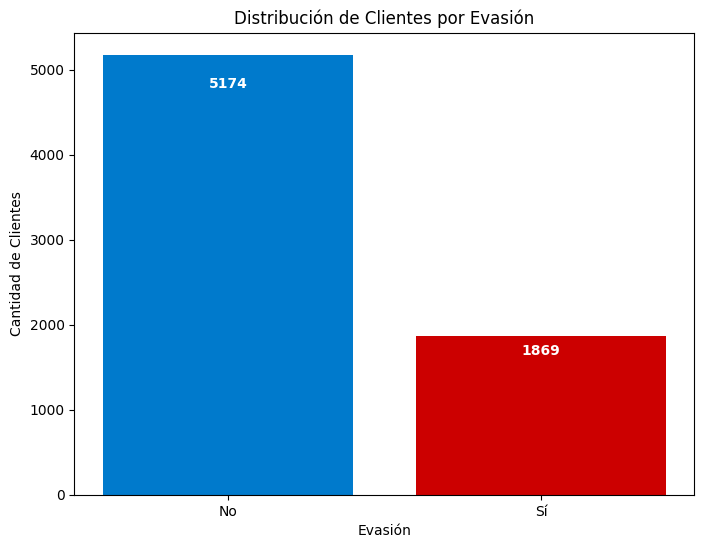

In [57]:
import matplotlib.pyplot as plt

# Calcular la distribución de la variable 'Churn'
distChurn= dfLimpio['Churn'].value_counts()
print("Análisis de la Distribución de Evasión:")
print(distChurn)

# Crear el gráfico de barras para visualizar la distribución
etiquetas = ['No', 'Sí']
valores = [distChurn.get(0, 0), distChurn.get(1, 0)]
plt.figure(figsize=(8, 6))
bars = plt.bar(etiquetas, valores, color=['#007ACC', '#CC0000'])
plt.title('Distribución de Clientes por Evasión')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Evasión')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - (yval * 0.05), int(yval), va='top', ha='center', color='white', fontweight='bold')
plt.show()

#### Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

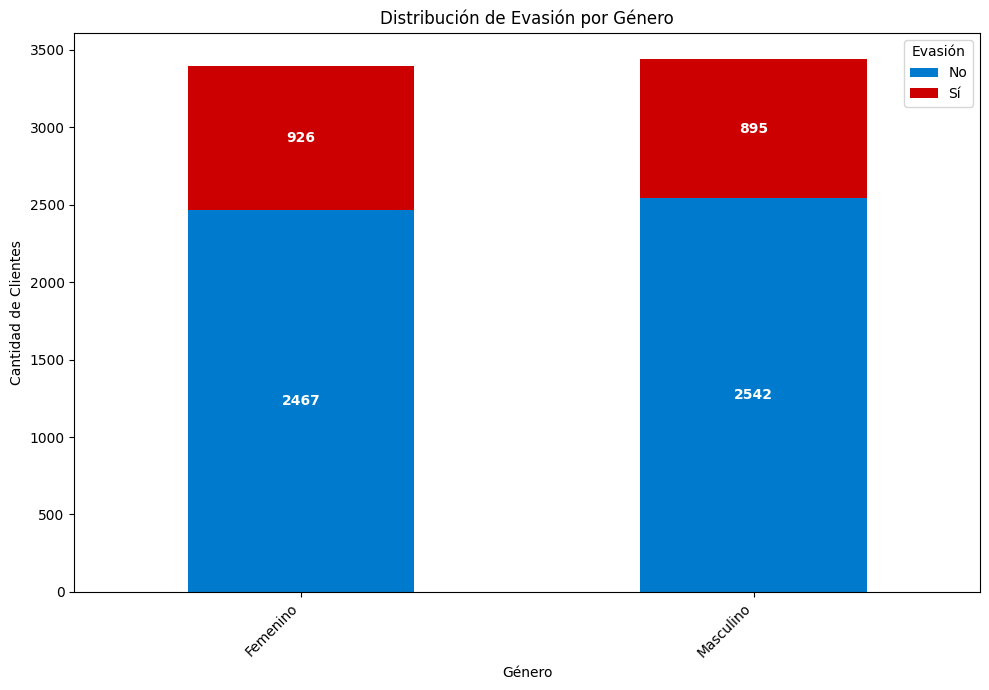

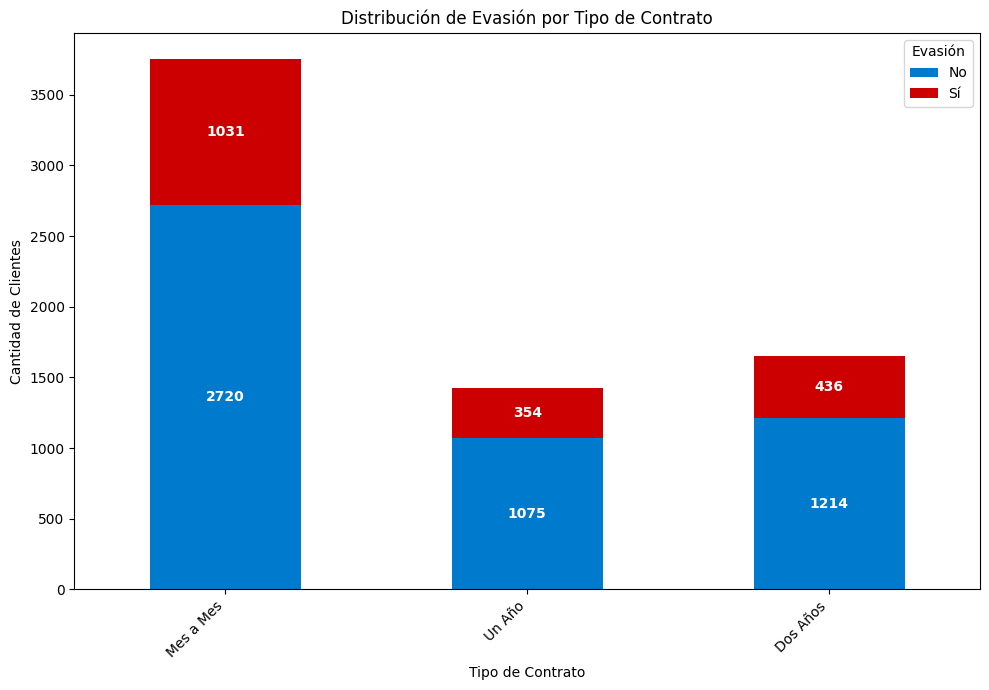

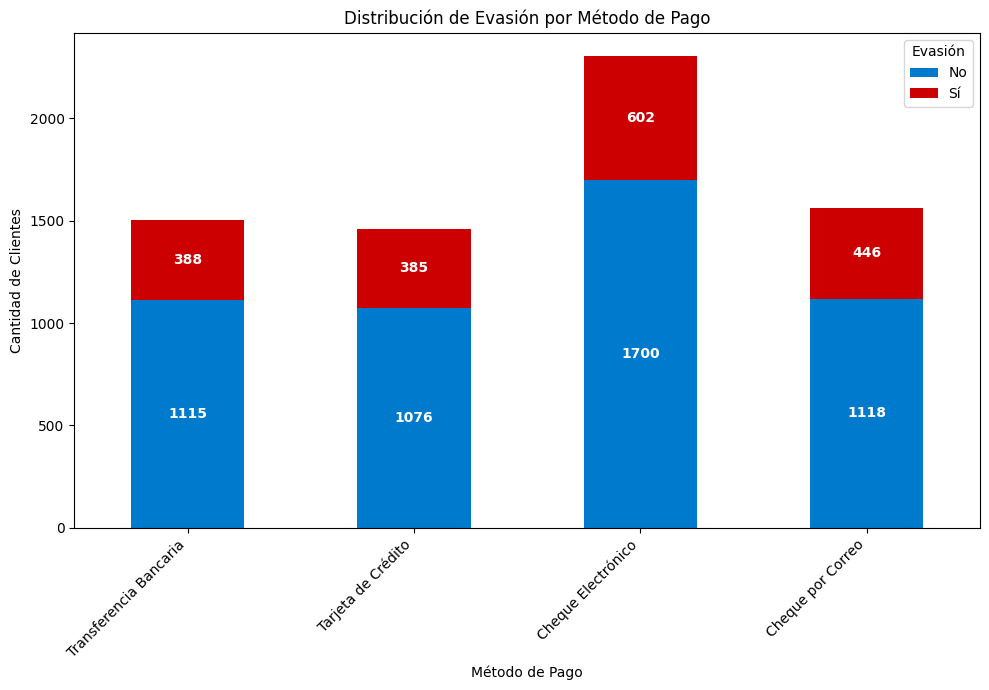

In [58]:
# Crear un nuevo DataFrame 'df_limpio'
dfLimpio = df[df['Churn'] != ''].copy()

dfLimpio['cuentasDiarias'] = dfLimpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
dfLimpio = dfLimpio.rename(columns=mapeo_columnas)

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
dfClienteNorm = pd.json_normalize(dfLimpio['Cliente'])
dfInternetNorm = pd.json_normalize(dfLimpio['Servicio_Internet'])
dfCuentaNorm = pd.json_normalize(dfLimpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = dfLimpio[['ID_Cliente', 'Evasion', 'cuentasDiarias']].copy()
df_final = pd.concat([df_final, dfClienteNorm, dfInternetNorm, dfCuentaNorm], axis=1)

#---Análisis y Visualización de Evasión por Categoría---

# Lista de variables categóricas a analizar
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a Mes',
    'One year': 'Un Año',
    'Two year': 'Dos Años',
    'Electronic check': 'Cheque Electrónico',
    'Mailed check': 'Cheque por Correo',
    'Bank transfer (automatic)': 'Transferencia Bancaria',
    'Credit card (automatic)': 'Tarjeta de Crédito'
}
varAn = ['gender', 'Contract', 'PaymentMethod']
nomEsp = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Nombres en español para los títulos de los gráficos
nomEsp = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Desarrollo del gráfico
for i, variable in enumerate(varAn):


    crosstab = pd.crosstab(df_final[variable], df_final['Evasion'])
    crosstab.rename(index=traducciones, inplace=True)
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#007ACC', '#CC0000'])

    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', color='white', fontweight='bold')

    # Configurar el gráfico
    plt.title(f'Distribución de Evasión por {nomEsp[i]}')
    plt.ylabel('Cantidad de Clientes')
    plt.xlabel(nomEsp[i])
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evasión', labels=['No', 'Sí'])

    # Ajustar el layout y mostrar el gráfico
    plt.tight_layout()
    plt.show()

####Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes

Se eliminaron las filas problemáticas.
Se ha creado la columna 'Cuentas_Diarias'.
Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.


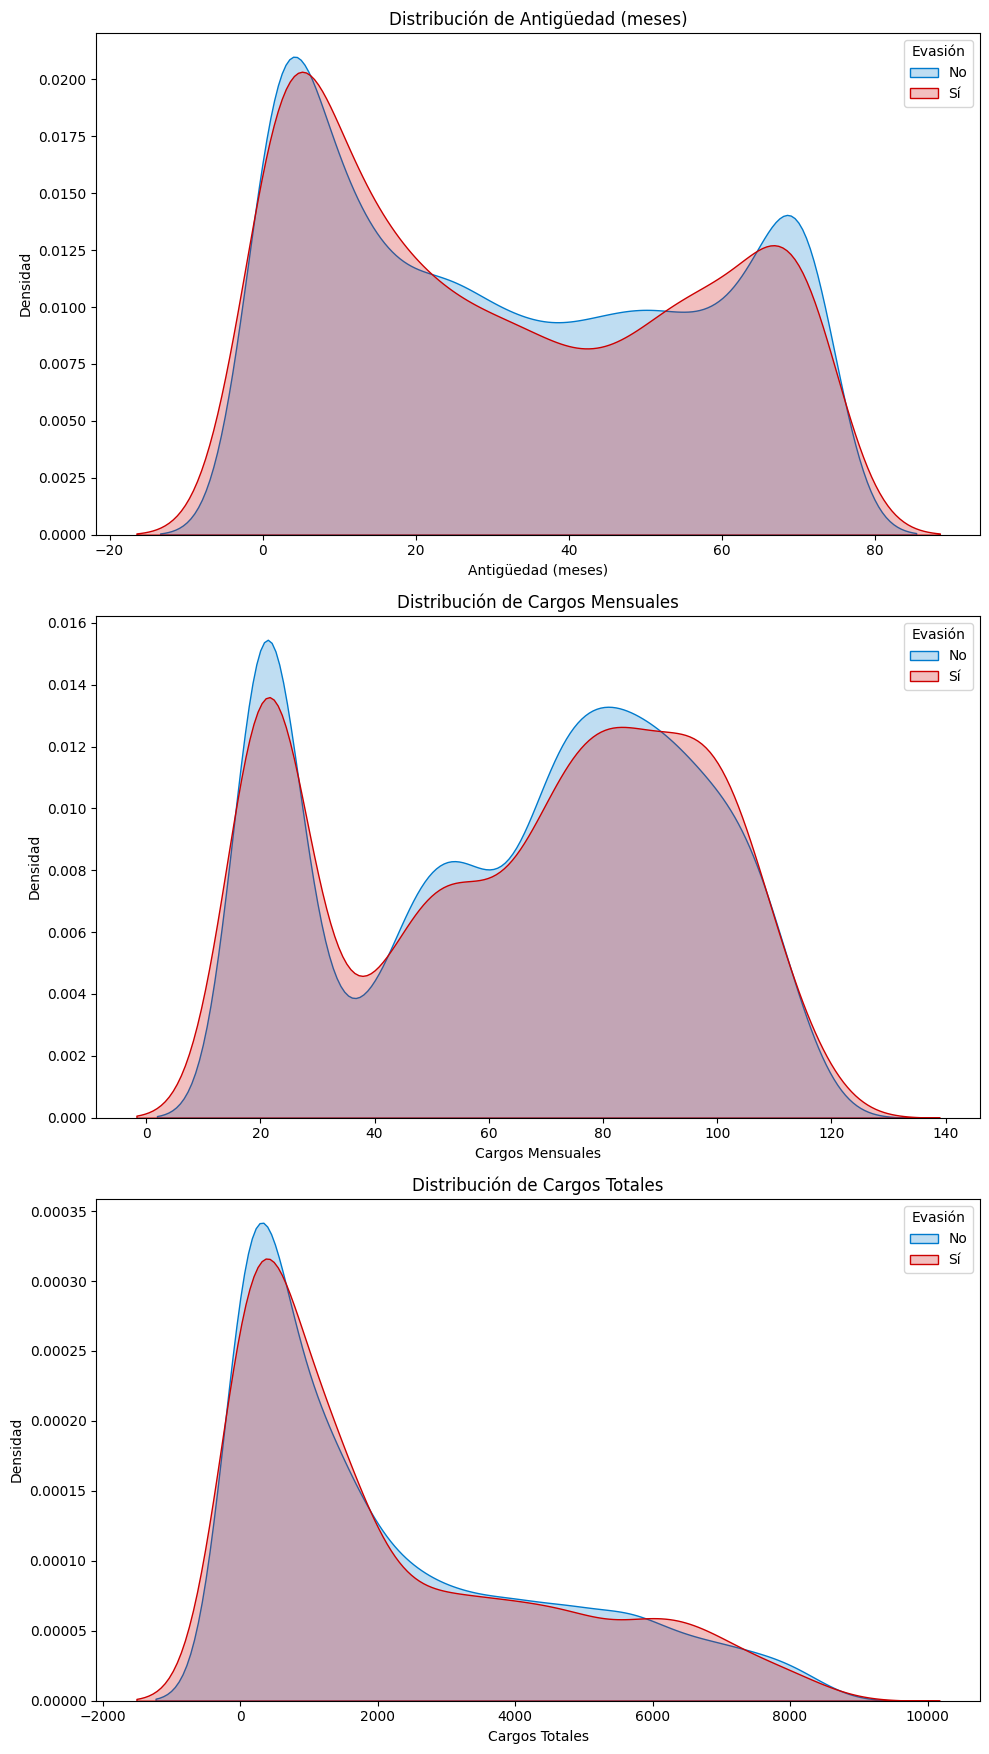

In [59]:
import seaborn as sns

# Crear un nuevo DataFrame 'df_limpio'
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

#---Normalización de Datos Anidados---


df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_internet_norm, df_cuenta_norm], axis=1)


df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)


variables_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

nombres_en_espanol_num = ['Antigüedad (meses)', 'Cargos Mensuales', 'Cargos Totales']

fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=1, figsize=(10, 6 * len(variables_numericas)))

# Desarrollo del gráfico
for i, variable in enumerate(variables_numericas):
    ax = axes[i]
    sns.kdeplot(df_final[df_final['Evasion'] == 0][variable], label='No', fill=True, color='#007ACC', ax=ax)
    sns.kdeplot(df_final[df_final['Evasion'] == 1][variable], label='Sí', fill=True, color='#CC0000', ax=ax)

    # Configurar el gráfico
    ax.set_title(f'Distribución de {nombres_en_espanol_num[i]}')
    ax.set_xlabel(nombres_en_espanol_num[i])
    ax.set_ylabel('Densidad')
    ax.legend(title='Evasión')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#Informe final


🔹 Introducción:

Telecom X - Análisis de Evasión de Clientes

La empresa "Telecom X" enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir deel análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

🔹 Limpieza y Tratamiento de Datos:

Se llevó a cabo una revisión  para garantizar la calidad de los datos:

* Valores Ausentes: No se encontraron valores nulos en el conjunto de datos.
* Valores Duplicados: No se detectaron filas duplicadas basadas en el customerID y Churn.
* Errores de Formato: La verificación inicial de tipos de datos no reveló errores obvios de formato, aunque los detalles dentro de los datos anidados se abordaron después de la normalización.
* Inconsistencias en Categorías: Se descubrió que la columna Churn contenía valores vacíos (''). Se identificaron 224 filas con esta inconsistencia, que fueron eliminadas. El DataFrame resultante, df_limpio, quedó con 7043 filas.


Para enriquecer el análisis, se realizaron las siguientes transformaciones:

* Creación de la Columna cuentasDiarias: Se calculó el costo diario dividiendo los cargos mensuales por 30.
* Estandarización de Churn: La columna Churn se convirtió a un formato binario (1 para 'Sí' y 0 para 'No').
* Renombramiento de Columnas: Las columnas se renombraron al español para una mejor comprensión.
* Normalización de Datos Anidados: Las columnas con datos anidados (Cliente, Servicio_Internet, Cuenta, etc.) se "descomprimieron" utilizando pd.json_normalize. Esto convirtió la información de los diccionarios en columnas individuales, creando un df_final listo para el análisis.

🔹 Análisis Exploratorio de Datos:

Se calcularon estadísticas descriptivas para las variables numéricas, lo que proporcionó una visión general de medidas como la media, la mediana y la desviación estándar. La tasa de evasión promedio en el conjunto de datos se situó en un 26.5%.
Distribución de Evasión

El análisis de la variable "Evasion" mostró un desbalance en los datos:
* Clientes que no cancelaron (No): 5174 (73.5%)
* Clientes que cancelaron (Sí): 1869 (26.5%)

Esta visualización inicial es clave para entender la magnitud del problema del churn.

Recuento de Evasión por Variables Categóricas
Se analizaron varias variables categóricas para identificar perfiles de clientes con mayor propensión a la evasión:

* Género: La tasa de evasión es prácticamente la misma para hombres y mujeres, lo que indica que el género no es un factor diferenciador.
* Tipo de Contrato: Se observa una tasa de evasión marcadamente más alta en los clientes con contrato "Mes a Mes", en comparación con los contratos anuales o bianuales.
* Método de Pago: Los clientes que pagan con "Cheque Electrónico" tienen una tasa de evasión notablemente superior a los demás métodos de pago.

Conteo de Evasión por Variables Numéricas

La distribución de las variables numéricas reveló diferencias significativas entre los clientes que se quedaron y los que se fueron:

* Antigüedad (tenure): Los clientes que cancelaron tienden a tener una antigüedad mucho menor. La mayoría de las cancelaciones ocurren en los primeros meses de servicio.
* Cargos Mensuales: Los clientes que cancelaron suelen tener cargos mensuales más altos.
* Cargos Totales: Inversamente a los cargos mensuales, los clientes que cancelan tienden a tener cargos totales acumulados más bajos, lo cual está correlacionado con su menor antigüedad.

🔹 Conclusiones e Insights:

Los clientes tienden a prescindir del servicio por alguna posible inconformidad en el contrato el cual puede ser, según los datos, por los métodos de pago.


#TelecomX_2

##Preparación de los datos

Carga el archivo CSV que contiene los datos tratados anteriormente. 📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [60]:
df.to_csv("datos_tratados.csv", index=False)

####Eliminación de columnas irrelevantes
Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente).
Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [61]:
df_final_sin_id = df_final.drop('ID_Cliente', axis=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df_final_sin_id.head())



   Evasion  Costo_Diario  gender  SeniorCitizen Partner Dependents  tenure InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total
0      0.0      2.186667  Female            0.0     Yes        Yes     9.0             DSL             No          Yes               No         Yes         Yes              No        One year              Yes      Mailed check             65.6         593.30
1      0.0      1.996667    Male            0.0      No         No     9.0             DSL             No           No               No          No          No             Yes  Month-to-month               No      Mailed check             59.9         542.40
2      1.0      2.463333    Male            0.0      No         No     4.0     Fiber optic             No           No              Yes          No          No              No  Month-to-month              Yes  Electronic ch

#### Manejo de inconsisntencias

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [62]:

# --- Encoding (One-Hot) ---

df_encoded = pd.get_dummies(df_final_sin_id, drop_first=True, dtype=int)
print(df_encoded.head())

# --- Información Detallada del DataFrame Final ---

print("\nInformación del nuevo DataFrame (df_encoded):")
print(f"Index: {len(df_encoded)} entries, {df_encoded.index[0]} to {df_encoded.index[-1]}")
print(f"Data columns (total {df_encoded.shape[1]} columns):")
print("---  ------                                  --------------  -----")
print("#   Column                                  Non-Null Count  Dtype")
print("---  ------                                  --------------  -----")
for i, col in enumerate(df_encoded.columns):
    non_null_count = df_encoded[col].count()
    dtype = df_encoded[col].dtype
    # Se usa formato con padding para alinear las columnas
    print(f"{i:<3} {col:<40} {non_null_count:<15} {str(dtype)}")

   Evasion  Costo_Diario  SeniorCitizen  tenure  Charges.Monthly  Charges.Total  gender_Male  Partner_Yes  Dependents_Yes  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_One year  Contract_Two year  PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0      0.0      2.186667            0.0     9.0             65.6         593.30            0            1               1                            0                   0                                   0                   0                                 0                 1                                     0                     0      

#### Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [63]:
print("Conteo de Clientes por Evasión")
conteo_evasion = df_encoded['Evasion'].value_counts()
print(conteo_evasion.to_string())
print("-" * 40)

# Proporción Porcentual de Evasión ---

print("\nProporción de Clientes por Evasión (%)")
proporcion_evasion = df_encoded['Evasion'].value_counts(normalize=True) * 100
print(proporcion_evasion.round(2).to_string())

Conteo de Clientes por Evasión
Evasion
0.0    5174
1.0    1869
----------------------------------------

Proporción de Clientes por Evasión (%)
Evasion
0.0    73.46
1.0    26.54


In [64]:
from imblearn.over_sampling import SMOTE

df_encoded_clean = df_encoded.dropna(subset=['Evasion'])

X = df_encoded_clean.drop('Evasion', axis=1)
y = df_encoded_clean['Evasion']

#Imputación de Valores Nulos en las Características

X_imputed = X.fillna(X.median())


#Verificación del Conteo de Clases (Antes del Balanceo)

print("Conteo de Clases ANTES de SMOTE")
print(y.value_counts().to_string())
print("-" * 40)

#Aplicación de la Técnica SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

#Verificación del Conteo de Clases (Después del Balanceo)

print("\nConteo de Clases DESPUÉS de SMOTE")
print(y_res.value_counts().to_string())

Conteo de Clases ANTES de SMOTE
Evasion
0.0    5174
1.0    1869
----------------------------------------

Conteo de Clases DESPUÉS de SMOTE
Evasion
0.0    5174
1.0    5174


####Normalización o Estandarización

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_res.columns)
print(X_scaled_df.head())

   Costo_Diario  SeniorCitizen    tenure  Charges.Monthly  Charges.Total  gender_Male  Partner_Yes  Dependents_Yes  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_One year  Contract_Two year  PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0     -0.088300      -0.448501 -0.958569         0.022882      -0.712036    -0.830841     1.217183        1.807058                    -0.829513           -0.521119                           -0.521119           -0.542801                         -0.521119          1.581727                             -0.521119             -0.635366                    

###Correlación y Selección de Variables


#### Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

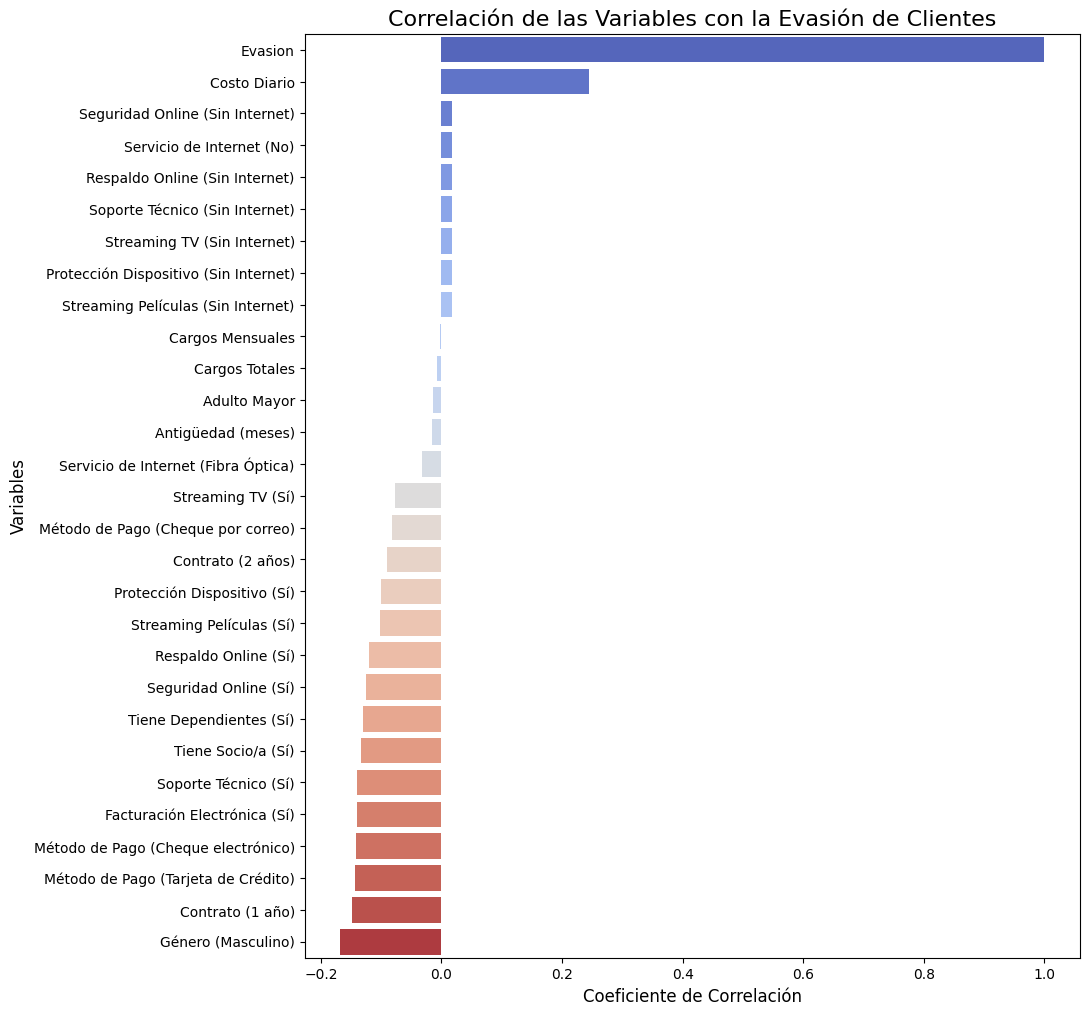

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creación de un DataFrame Balanceado
df_resampled = pd.concat([y_res, X_res], axis=1)

#Cálculo de la Matriz de Correlación
correlation_evasion = df_resampled.corr()['Evasion'].sort_values(ascending=False)

traducciones = {
    'Contract_Two year': 'Contrato (2 años)',
    'tenure': 'Antigüedad (meses)',
    'OnlineSecurity_No internet service': 'Seguridad Online (Sin Internet)',
    'TechSupport_No internet service': 'Soporte Técnico (Sin Internet)',
    'DeviceProtection_No internet service': 'Protección Dispositivo (Sin Internet)',
    'OnlineBackup_No internet service': 'Respaldo Online (Sin Internet)',
    'StreamingTV_No internet service': 'Streaming TV (Sin Internet)',
    'StreamingMovies_No internet service': 'Streaming Películas (Sin Internet)',
    'InternetService_No': 'Servicio de Internet (No)',
    'Contract_One year': 'Contrato (1 año)',
    'Charges.Total': 'Cargos Totales',
    'PaymentMethod_Mailed check': 'Método de Pago (Cheque por correo)',
    'PaymentMethod_Credit card (automatic)': 'Método de Pago (Tarjeta de Crédito)',
    'gender_Male': 'Género (Masculino)',
    'Partner_Yes': 'Tiene Socio/a (Sí)',
    'MultipleLines_No phone service': 'Múltiples Líneas (Sin Teléfono)',
    'MultipleLines_Yes': 'Múltiples Líneas (Sí)',
    'Dependents_Yes': 'Tiene Dependientes (Sí)',
    'PhoneService_Yes': 'Servicio Telefónico (Sí)',
    'OnlineBackup_Yes': 'Respaldo Online (Sí)',
    'DeviceProtection_Yes': 'Protección Dispositivo (Sí)',
    'TechSupport_Yes': 'Soporte Técnico (Sí)',
    'StreamingTV_Yes': 'Streaming TV (Sí)',
    'StreamingMovies_Yes': 'Streaming Películas (Sí)',
    'PaperlessBilling_Yes': 'Facturación Electrónica (Sí)',
    'SeniorCitizen': 'Adulto Mayor',
    'Charges.Monthly': 'Cargos Mensuales',
    'Costo_Diario': 'Costo Diario',
    'OnlineSecurity_Yes': 'Seguridad Online (Sí)',
    'PaymentMethod_Electronic check': 'Método de Pago (Cheque electrónico)',
    'InternetService_Fiber optic': 'Servicio de Internet (Fibra Óptica)'
}

correlation_evasion.rename(index=traducciones, inplace=True)

#Creación del Gráfico de Correlación
plt.figure(figsize=(10, 12))

sns.barplot(x=correlation_evasion.values, y=correlation_evasion.index,
            hue=correlation_evasion.index, palette='coolwarm', legend=False)

plt.title('Correlación de las Variables con la Evasión de Clientes', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.show()

####Anáisis dirigido


Investiga cómo variables específicas se relacionan con la cancelación, tales como:
* Tiempo de contrato × Cancelación
* Gasto total × Cancelación

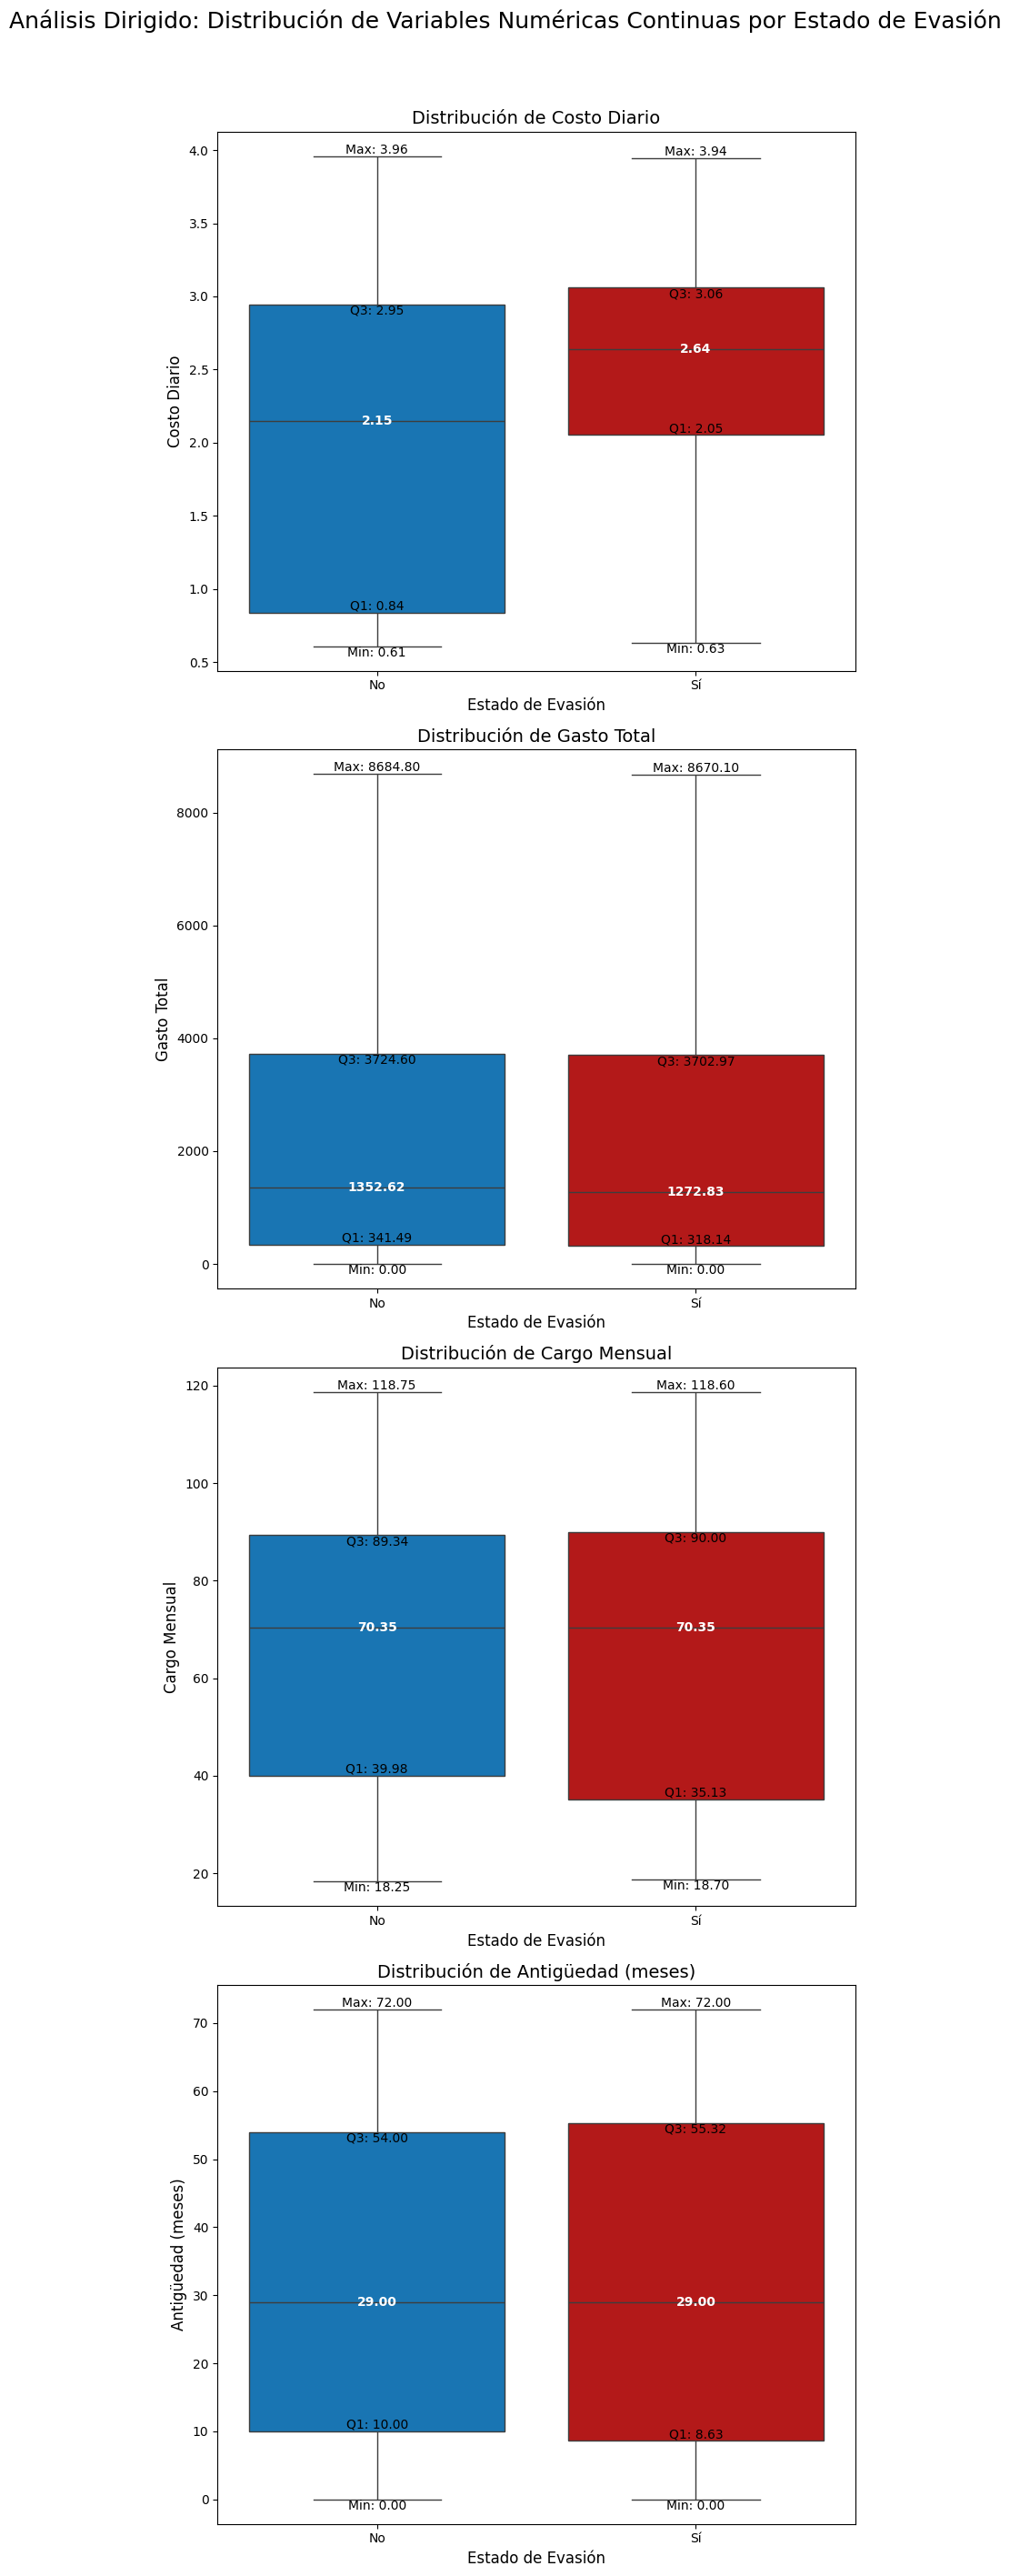

In [67]:
df_resampled = pd.concat([y_res, X_res], axis=1)

varGraf = [
    'Costo_Diario',
    'Charges.Total',
    'Charges.Monthly',
    'tenure'
]
traducciones = {
    'Costo_Diario': 'Costo Diario',
    'Charges.Total': 'Gasto Total',
    'Charges.Monthly': 'Cargo Mensual',
    'tenure': 'Antigüedad (meses)'
}

#Creación de una Figura con Múltiples Subgráficos
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 28))
fig.suptitle('Análisis Dirigido: Distribución de Variables Numéricas Continuas por Estado de Evasión', fontsize=18, y=1.01)

# Bucle para Generar los Gráficos
for idx, var in enumerate(varGraf):
    ax = axes[idx]

    # Se crea el boxplot con la paleta de colores personalizada (azul y rojo).
    sns.boxplot(x='Evasion', y=var, data=df_resampled,
                palette={0: '#007ACC', 1: '#CC0000'}, hue='Evasion', ax=ax)

    # Se recorren las dos categorías de Evasión (0 y 1) para añadir las anotaciones.
    for i in [0, 1]:
        subset = df_resampled[df_resampled['Evasion'] == i][var]
        q1, median, q3 = subset.quantile(0.25), subset.quantile(0.50), subset.quantile(0.75)
        iqr = q3 - q1
        min_val = subset[subset >= q1 - 1.5 * iqr].min()
        max_val = subset[subset <= q3 + 1.5 * iqr].max()


        ax.text(i, median, f'{median:.2f}', ha='center', va='center', color='white', fontweight='bold')
        ax.text(i, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', color='black')
        ax.text(i, q3, f'Q3: {q3:.2f}', ha='center', va='top', color='black')
        ax.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='top', color='black')
        ax.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='bottom', color='black')


    titulo_traducido = traducciones[var]
    ax.set_title(f'Distribución de {titulo_traducido}', fontsize=14)
    ax.set_xlabel('Estado de Evasión', fontsize=12)
    ax.set_ylabel(titulo_traducido, fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

#Modelado Predictivo

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df,
    y_res,
    test_size=0.3,
    random_state=42
)

# --- Verificación de la División ---

print("Dimensiones del conjunto de entrenamiento (características):", X_train.shape)
print("Dimensiones del conjunto de prueba (características):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento (objetivo):", y_train.shape)
print("Dimensiones del conjunto de prueba (objetivo):", y_test.shape)

Dimensiones del conjunto de entrenamiento (características): (7243, 28)
Dimensiones del conjunto de prueba (características): (3105, 28)
Dimensiones del conjunto de entrenamiento (objetivo): (7243,)
Dimensiones del conjunto de prueba (objetivo): (3105,)


####Creación de modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Preparación de los dos Conjuntos de Datos ---


# a) Datos NO estandarizados
df_resampled = pd.concat([y_res, X_res], axis=1)
X_no_scaled = df_resampled.drop('Evasion', axis=1)
y_no_scaled = df_resampled['Evasion']

# b) Datos ESTANDARIZADOS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_res.columns)


#Separación de Datos para Ambos Escenarios
#
# Se dividen ambos conjuntos de datos en entrenamiento y prueba.

# a) División para datos NO estandarizados
X_train, X_test, y_train, y_test = train_test_split(
    X_no_scaled, y_no_scaled, test_size=0.3, random_state=42)

# b) División para datos ESTANDARIZADOS
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled_df, y_no_scaled, test_size=0.3, random_state=42)


# Modelo 1: Regresión Logística (con datos estandarizados)
print("Entrenando Modelo 1: Regresión Logística")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_scaled)
print("Modelo de Regresión Logística entrenado exitosamente.")
print("-" * 50)


# Modelo 2: Random Forest (con datos no estandarizados)
print("\nEntrenando Modelo 2: Random Forest")
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
print("Modelo de Random Forest entrenado exitosamente.")
print("-" * 50)


#Modelo 3: Support Vector Machine (con datos estandarizados)
print("\nEntrenando Modelo 3: Support Vector Machine (SVM)")
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train_scaled)
print("Modelo SVM entrenado exitosamente.")
print("-" * 50)

#Modelo 4: Red Neuronal (MLP Classifier) (con datos estandarizados)
print("\nEntrenando Modelo 4: Red Neuronal (MLP)")
nn_model = MLPClassifier(random_state=42, max_iter=500) # Se aumenta max_iter para asegurar la convergencia
nn_model.fit(X_train_scaled, y_train_scaled)
print("Modelo de Red Neuronal entrenado exitosamente.")

Entrenando Modelo 1: Regresión Logística
Modelo de Regresión Logística entrenado exitosamente.
--------------------------------------------------

Entrenando Modelo 2: Random Forest
Modelo de Random Forest entrenado exitosamente.
--------------------------------------------------

Entrenando Modelo 3: Support Vector Machine (SVM)
Modelo SVM entrenado exitosamente.
--------------------------------------------------

Entrenando Modelo 4: Red Neuronal (MLP)
Modelo de Red Neuronal entrenado exitosamente.


Métricas de Evaluación: Regresión Logística
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71      1588
         1.0       0.70      0.70      0.70      1517

    accuracy                           0.71      3105
   macro avg       0.71      0.71      0.71      3105
weighted avg       0.71      0.71      0.71      3105

-------------------------------------------------------

Matriz de Confusión: Regresión Logística


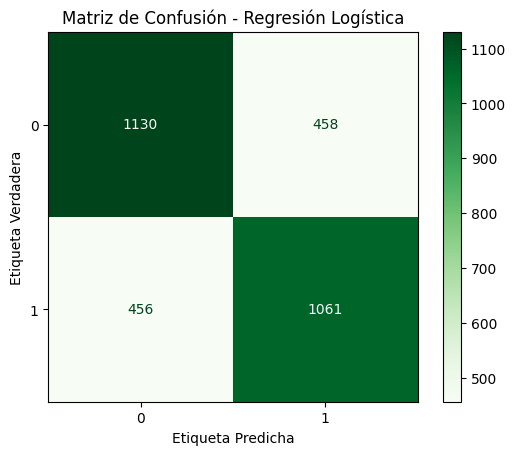


Métricas de Evaluación: Random Forest
              precision    recall  f1-score   support

         0.0       0.75      0.80      0.78      1588
         1.0       0.78      0.73      0.75      1517

    accuracy                           0.76      3105
   macro avg       0.77      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105

-------------------------------------------------------

Matriz de Confusión: Random Forest


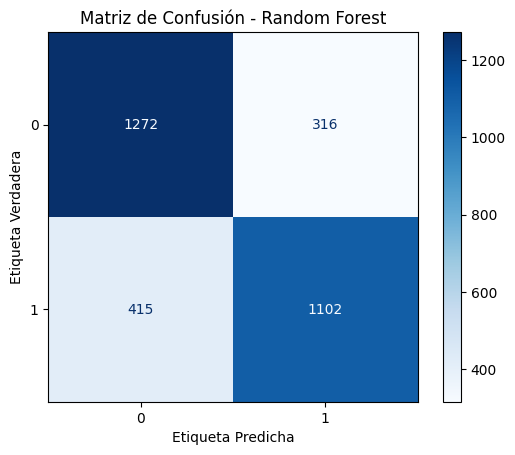


Métricas de Evaluación: Support Vector Machine (SVM)
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75      1588
         1.0       0.75      0.69      0.72      1517

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105

-------------------------------------------------------

--- Matriz de Confusión: SVM ---


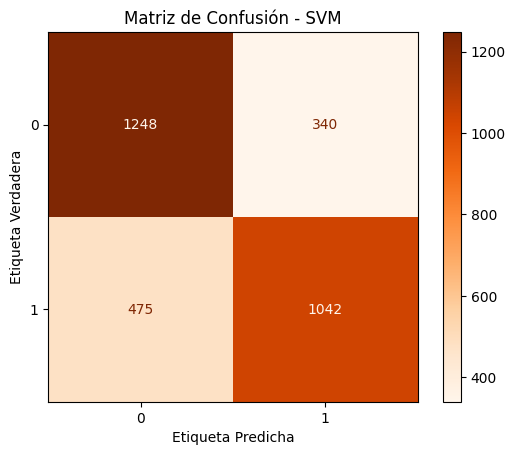


Métricas de Evaluación: Red Neuronal (MLP)
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72      1588
         1.0       0.71      0.72      0.72      1517

    accuracy                           0.72      3105
   macro avg       0.72      0.72      0.72      3105
weighted avg       0.72      0.72      0.72      3105

-------------------------------------------------------

--- Matriz de Confusión: Red Neuronal (MLP) ---


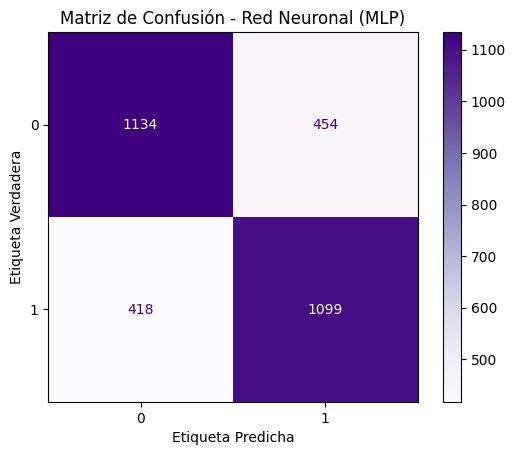


--- Comparación de Exactitud (Entrenamiento vs. Prueba) ---
Regresión Logística   - Entrenamiento: 0.7137, Prueba: 0.7056
Random Forest         - Entrenamiento: 0.9999, Prueba: 0.7646
SVM                   - Entrenamiento: 0.7716, Prueba: 0.7375
Red Neuronal (MLP)    - Entrenamiento: 0.8626, Prueba: 0.7192


In [70]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

#Realización de Predicciones
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_nn = nn_model.predict(X_test_scaled)


#Evaluación del Modelo 1: Regresión Logística
print("Métricas de Evaluación: Regresión Logística")
print(classification_report(y_test, y_pred_log_reg))
print("-" * 55)

# Se genera la matriz de confusión, una tabla que visualiza los aciertos y errores.
print("\nMatriz de Confusión: Regresión Logística")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot(cmap='Greens')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


#Evaluación del Modelo 2: Random Forest
# Se repite el mismo proceso de evaluación para el modelo de Random Forest.
print("\nMétricas de Evaluación: Random Forest")
print(classification_report(y_test, y_pred_rand_forest))
print("-" * 55)

# Se genera su respectiva matriz de confusión para un análisis visual.
print("\nMatriz de Confusión: Random Forest")
cm_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)
disp_rand_forest = ConfusionMatrixDisplay(confusion_matrix=cm_rand_forest)
disp_rand_forest.plot(cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

#Evaluación del Modelo 3: Support Vector Machine (SVM)
# Se realiza la evaluación para el modelo SVM.
print("\nMétricas de Evaluación: Support Vector Machine (SVM)")
print(classification_report(y_test, y_pred_svm))
print("-" * 55)

# Se genera la matriz de confusión para el modelo SVM.
print("\n--- Matriz de Confusión: SVM ---")
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Oranges')
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


# --- Evaluación del Modelo 4: Red Neuronal (MLP) ---

print("\nMétricas de Evaluación: Red Neuronal (MLP)")
print(classification_report(y_test, y_pred_nn))
print("-" * 55)

# Se genera la matriz de confusión para la Red Neuronal.
print("\n--- Matriz de Confusión: Red Neuronal (MLP) ---")
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp_nn.plot(cmap='Purples')
plt.title('Matriz de Confusión - Red Neuronal (MLP)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# --- Análisis de Overfitting / Underfitting (para los 4 modelos) ---

# Se calcula la exactitud (accuracy) de cada modelo tanto en el conjunto de entrenamiento como en el de prueba.
log_reg_train_acc = accuracy_score(y_train, log_reg.predict(X_train_scaled))
log_reg_test_acc = accuracy_score(y_test, y_pred_log_reg)

rand_forest_train_acc = accuracy_score(y_train, rand_forest.predict(X_train))
rand_forest_test_acc = accuracy_score(y_test, y_pred_rand_forest)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train_scaled))
svm_test_acc = accuracy_score(y_test, y_pred_svm)

nn_train_acc = accuracy_score(y_train, nn_model.predict(X_train_scaled))
nn_test_acc = accuracy_score(y_test, y_pred_nn)

print("\n--- Comparación de Exactitud (Entrenamiento vs. Prueba) ---")
print(f"Regresión Logística   - Entrenamiento: {log_reg_train_acc:.4f}, Prueba: {log_reg_test_acc:.4f}")
print(f"Random Forest         - Entrenamiento: {rand_forest_train_acc:.4f}, Prueba: {rand_forest_test_acc:.4f}")
print(f"SVM                   - Entrenamiento: {svm_train_acc:.4f}, Prueba: {svm_test_acc:.4f}")
print(f"Red Neuronal (MLP)    - Entrenamiento: {nn_train_acc:.4f}, Prueba: {nn_test_acc:.4f}")

#Conclusión

Verificar los tipos de contraros con los que se atraen a clientes nuevos.

Hacer que los metodos de pago estén al acance de las mayorías.

En medida de lo posible realizar un ajuste a sus tarifas.

Y regular las cantidades de servicios que se le ofrecenal cliente, entre más servicios contraten o se oferten es más alta la probabilidad que en un futuro cancelen el servicio.